In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
csv_in="data/stock_price.csv"
df=pd.read_csv(csv_in, skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(48, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Date        48 non-null     int64
 1   NIKKEI      48 non-null     int64
 2   HITACHI     48 non-null     int64
 3   TOSHIBA     48 non-null     int64
 4   MITSUBISHI  48 non-null     int64
 5   NEC         48 non-null     int64
 6   FUJITSU     48 non-null     int64
 7   PANASONIC   48 non-null     int64
 8   SONY        48 non-null     int64
dtypes: int64(9)
memory usage: 3.5 KB
None


,Date,NIKKEI,HITACHI,TOSHIBA,MITSUBISHI,NEC,FUJITSU,PANASONIC,SONY
0,200501,11388,688,419,510,594,602,1537,3840
1,200502,11741,663,460,549,679,688,1565,3990
2,200503,11669,666,448,555,648,644,1580,4270
3,200504,11009,620,430,556,578,578,1537,3920
4,200505,11277,652,445,592,603,597,1622,4060


In [3]:
df_num=df.loc[:,'NIKKEI':"SONY"]
display(df_num.head())

,NIKKEI,HITACHI,TOSHIBA,MITSUBISHI,NEC,FUJITSU,PANASONIC,SONY
0,11388,688,419,510,594,602,1537,3840
1,11741,663,460,549,679,688,1565,3990
2,11669,666,448,555,648,644,1580,4270
3,11009,620,430,556,578,578,1537,3920
4,11277,652,445,592,603,597,1622,4060


In [4]:
df_corr=df_num.corr()
display(df_corr)

,NIKKEI,HITACHI,TOSHIBA,MITSUBISHI,NEC,FUJITSU,PANASONIC,SONY
NIKKEI,1.000000,0.820419,0.825605,0.804968,0.621368,0.879986,0.856393,0.907624
HITACHI,0.820419,1.000000,0.670851,0.655384,0.661257,0.704448,0.788437,0.879052
TOSHIBA,0.825605,0.670851,1.000000,0.939484,0.255770,0.644309,0.707113,0.842716
MITSUBISHI,0.804968,0.655384,0.939484,1.000000,0.186838,0.619232,0.700304,0.800375
NEC,0.621368,0.661257,0.255770,0.186838,1.000000,0.734784,0.579141,0.556657
FUJITSU,0.879986,0.704448,0.644309,0.619232,0.734784,1.000000,0.874444,0.723135
PANASONIC,0.856393,0.788437,0.707113,0.700304,0.579141,0.874444,1.000000,0.783069
SONY,0.907624,0.879052,0.842716,0.800375,0.556657,0.723135,0.783069,1.000000


In [5]:
print(df_corr.corrwith(df_corr['NIKKEI']))

NIKKEI        1.000000
HITACHI       0.405419
TOSHIBA       0.644665
MITSUBISHI    0.631339
NEC          -0.326031
FUJITSU       0.414795
PANASONIC     0.695960
SONY          0.779763
dtype: float64


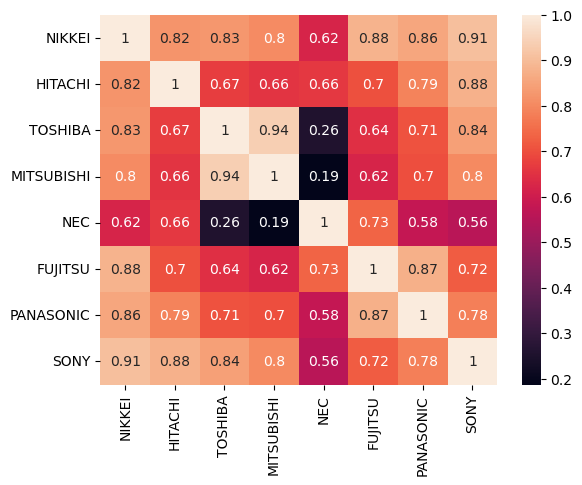

In [6]:
sns.heatmap(df_corr, annot=True)
plt.show()

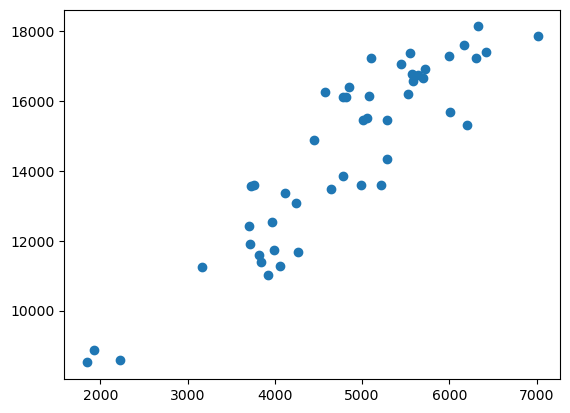

In [7]:
plt.scatter(df_num['SONY'], df_num['NIKKEI'])
plt.show()

In [8]:
import statsmodels.api as sm
X=df_num[['SONY']]
y=df_num[['NIKKEI']]
X_c=sm.add_constant(X)
display(X.head())
display(X_c.head())

,SONY
0,3840
1,3990
2,4270
3,3920
4,4060


,const,SONY
0,1.0,3840
1,1.0,3990
2,1.0,4270
3,1.0,3920
4,1.0,4060


In [9]:
model=sm.OLS(y,X_c)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 NIKKEI   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     215.0
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           5.86e-19
Time:                        15:56:15   Log-Likelihood:                -403.59
No. Observations:                  48   AIC:                             811.2
Df Residuals:                      46   BIC:                             814.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4599.9342    693.300      6.635      0.0

In [10]:
print(results.rsquared_adj)

0.8199510276303702


In [11]:
print(results.params)

const    4599.934179
SONY        2.070135
dtype: float64


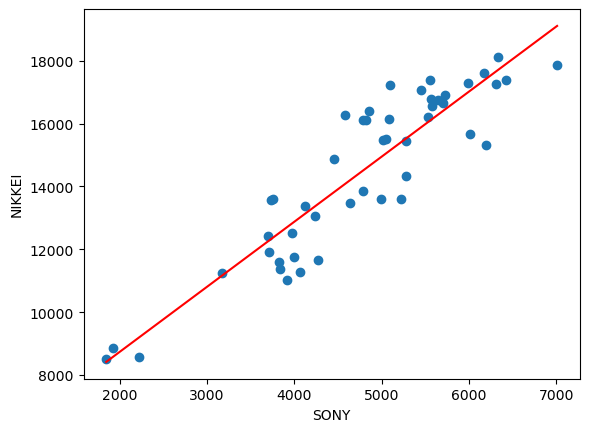

In [12]:
import numpy as np
a0=results.params['const']
a1=results.params['SONY']
x_min=X['SONY'].min()
x_max=X['SONY'].max()
x_min_max=np.array([x_min, x_max])
y_min_max=a0+a1*x_min_max
plt.scatter(X['SONY'],y)
plt.plot(x_min_max, y_min_max, c='red')
plt.xlabel('SONY')
plt.ylabel('NIKKEI')
plt.show()

In [13]:
x_test=np.array([3000])
y_test=a0+a1*x_test
print(y_test)

[10810.33844362]
